1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

3 [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [8]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [10]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [28]:
data[5].shape, len(data)

((2,), 1000)

In [100]:
lin_reg.errors_history[-1]

8207.526915767176

In [101]:
np.linalg.norm(lin_reg.weights_history[-1] - lin_reg.weights_history[-2], ord=2)

0.0008733916200960579

In [377]:
class LinearRegression:
    
    def __init__(self):
        self.errors_history = [] 
        self.weights_history = []
    
    def fit_gradient_boosting(self,
            X: np.array,
            y: np.array,
            learning_rate: float = 0.01,
            n_iters: int = 100000,
            tol: float = 1e-5):
       
    
        weights = np.random.randn(X.shape[1]) # инициализируем начальный вектор весов
        self.weights_history.append(weights)

        for n_iter in range(n_iters):
            y_pred = np.dot(X, weights)
            current_error = self.mse_error(y, y_pred)
            weights = weights - 2*learning_rate*np.dot(X.T, (y_pred-y))/len(y_pred)
            self.errors_history.append(current_error)
            self.weights_history.append(weights)

            if n_iter > 2 and np.linalg.norm(weights - self.weights_history[-2], ord=2) < tol:
                break

        return weights
    
    def fit_stochastic_gradient_boosting(self,
            X: np.array,
            y: np.array,
            learning_rate: float = 0.1,
            n_iters: int = 100000,
            tol: float = 1e-5):
       
    
        weights = np.random.randn(X.shape[1]) # инициализируем начальный вектор весов
        self.weights_history.append(weights)

        for n_iter in range(n_iters):
            # генерируем случайный индекс объекта выборки
            train_ind = np.random.randint(data.shape[0])
            y_pred = np.dot(X, weights)
            weights = weights - 2 * learning_rate * np.dot(X[train_ind].T, (np.dot(X[train_ind], weights) - y[train_ind])) / y.shape[0]
            current_error = self.mse_error(y, y_pred)
            self.errors_history.append(current_error)
            self.weights_history.append(weights)

            if n_iter > 2 and np.linalg.norm(weights - self.weights_history[-2], ord=2) < tol:
                break

        return weights
    
    def fit_l2_stochastic_gradient_boosting(self,
                                            X: np.array,
                                            y: np.array,
                                            learning_rate: float = 0.1,
                                            n_iters: int = 100000,
                                            alpha: float = 1e-10,
                                            tol: float = 1e-5):
       
    
        weights = np.random.randn(X.shape[1]) # инициализируем начальный вектор весов
        self.weights_history.append(weights)

        for n_iter in range(n_iters):
            # генерируем случайный индекс объекта выборки
            train_ind = np.random.randint(data.shape[0])
#             y_pred = np.dot(X, weights)
            weights = weights - (2 * learning_rate * np.dot(X[train_ind].T, (np.dot(X[train_ind], weights) - y[train_ind])) / y.shape[0] + 2 * alpha * np.sum(weights))
            current_error = self.l2_mse_error(y, X, weights, alpha)
            self.errors_history.append(current_error)
            self.weights_history.append(weights)

            if n_iter > 2 and np.linalg.norm(weights - self.weights_history[-2], ord=2) < tol:
                break

        return weights
    
    def fit_l1_stochastic_gradient_boosting(self,
                                            X: np.array,
                                            y: np.array,
                                            learning_rate: float = 0.1,
                                            n_iters: int = 100000,
                                            alpha: float = 1e-10,
                                            tol: float = 1e-5):
       
    
        weights = np.random.randn(X.shape[1]) # инициализируем начальный вектор весов
        self.weights_history.append(weights)

        for n_iter in range(n_iters):
            # генерируем случайный индекс объекта выборки
            train_ind = np.random.randint(data.shape[0])
#             y_pred = np.dot(X, weights)
            weights = weights - (2 * learning_rate * np.dot(X[train_ind].T, (np.dot(X[train_ind], weights) - y[train_ind])) / y.shape[0] + alpha * np.sum(weights)/np.sum(np.fabs(weights)))
            current_error = self.l1_mse_error(y, X, weights, alpha)
            self.errors_history.append(current_error)
            self.weights_history.append(weights)

            if n_iter > 2 and np.linalg.norm(weights - self.weights_history[-2], ord=2) < tol:
                break

        return weights

    def plot_fit_history(self, 
                         weights_history: np.array,
                         errors_history: np.array,
                         errors_history2: np.array,
                         s: str,
                         figsize=(15, 5)) -> None:
       
    
        fig = plt.figure(figsize=(15, 5))
        plt.suptitle(
            f"Optional rounds: {len(errors_history)}, Error: {errors_history[-1]}\n {s}",
            size=15
        )
        plt.subplot(121)
        plt.plot(errors_history, linewidth=3)
        plt.xlabel("n_iterations", size=15)
        plt.ylabel("MSE", size=15)
        
        plt.subplot(121)
        plt.plot(errors_history2, linewidth=3)
        plt.xlabel("n_iterations", size=15)
        plt.ylabel("MSE", size=15)

        plt.subplot(122)
        plt.plot(weights_history, linewidth=3)
        plt.legend([f"$w_{i}$" for i in range(len(weights_history[0]))], loc="best", fontsize=15)
        plt.xlabel("n_iterations", size=15)
        plt.ylabel("w", size=15)

    def mse_error(self, y_true: np.array, y_pred: np.array) -> float:


        assert len(y_true) == len(y_pred)

        return np.mean(np.square(y_true - y_pred))
    
    def l2_mse_error(self, y_true: np.array, X: np.array, weights: np.array, alpha: float) -> float:
        """
        MSE c L2 регуляризацией
        """
       
        y_pred = np.dot(X, weights)
        
        assert len(y_true) == len(y_pred)
        
        return np.mean(np.square(y_true - y_pred)) + (alpha * np.sum(np.square(weights)))
    
    def l1_mse_error(self, y_true: np.array, X: np.array, weights: np.array, alpha: float) -> float:
        
        """
        MSE c L1 регуляризацией
        """
       
        y_pred = np.dot(X, weights)
        
        assert len(y_true) == len(y_pred)
        
        return np.mean(np.square(y_true - y_pred)) + (alpha * np.sum(np.fabs(weights)))

In [378]:
tol, n_iters, alpha = 0.0000000001, 13000, 0.0001

LR_gradient = LinearRegression()

LR_gradient.fit_stochastic_gradient_boosting(data, target, tol = tol, n_iters = n_iters)

LR_stochastic_gradient = LinearRegression()

LR_stochastic_gradient.fit_gradient_boosting(data, target, tol = tol, n_iters = n_iters)

LR_L2 = LinearRegression()

LR_L2.fit_l2_stochastic_gradient_boosting(data, target, tol = tol, n_iters = n_iters, alpha = alpha)

LR_L1 = LinearRegression()

LR_L1.fit_l1_stochastic_gradient_boosting(data, target, tol = tol, n_iters = n_iters, alpha = alpha)



array([56.01860835, 61.69389057])

C:\Users\Kokorozaci\anaconda3\lib\site-packages\ipykernel_launcher.py:125: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Kokorozaci\anaconda3\lib\site-packages\ipykernel_launcher.py:125: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Kokorozaci\anaconda3\lib\site-packages\ipykernel_launcher.py:125: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

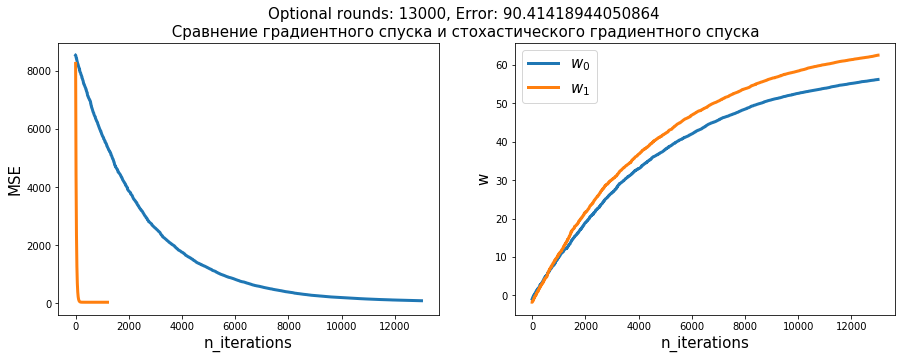

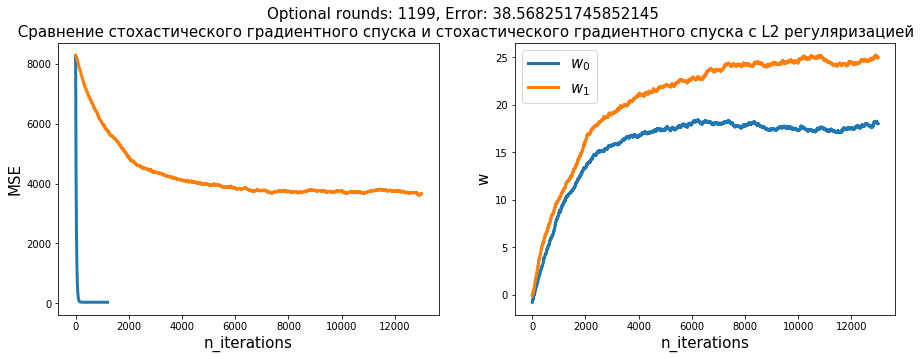

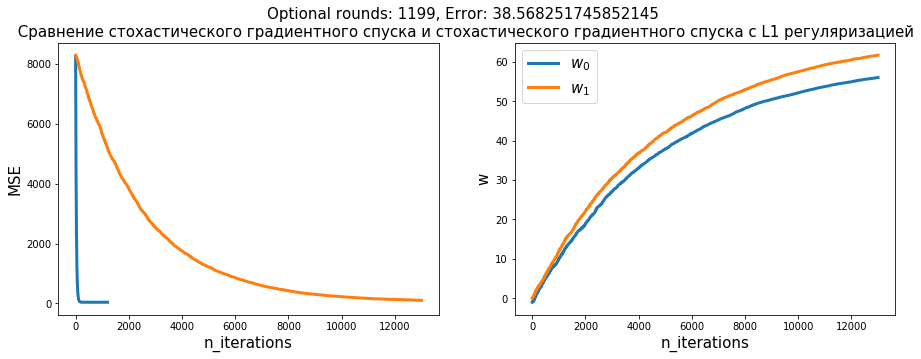

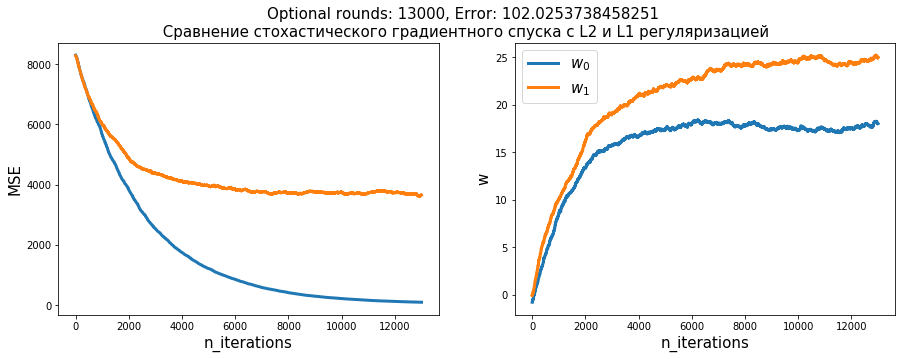

In [382]:
s = "Сравнение градиентного спуска и стохастического градиентного спуска"
LinearRegression().plot_fit_history(LR_gradient.weights_history, LR_gradient.errors_history, LR_stochastic_gradient.errors_history, s=s)
s = "Сравнение стохастического градиентного спуска и стохастического градиентного спуска с L2 регуляризацией"
LinearRegression().plot_fit_history(LR_L2.weights_history, LR_stochastic_gradient.errors_history, LR_L2.errors_history, s=s)
s = "Сравнение стохастического градиентного спуска и стохастического градиентного спуска с L1 регуляризацией"
LinearRegression().plot_fit_history(LR_L1.weights_history, LR_stochastic_gradient.errors_history, LR_L1.errors_history, s=s)
s = "Сравнение стохастического градиентного спуска с L2 и L1 регуляризацией"
LinearRegression().plot_fit_history(LR_L2.weights_history, LR_L1.errors_history, LR_L2.errors_history, s=s)